# Representing data

by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------
The first step towards building a ML model is to get to know and understand the structure of the data. For classification problems, a quick check to see whether your data is linearly separable or not could lead to quick solution. For regression, by looking at the cross correlation, or else could help to build a good strategy for regularizaztion.


## Classification <a id='part1'></a>

We follow here the example given in sklearn tutorial with Iris dataset. This data sets consists petal and sepal measures (width and length) for 3 different types of irises’ (Setosa, Versicolour, and Virginica). Data is of size 150x4, where rows are the samples and columns are Sepal Length, Sepal Width, Petal Length and Petal Width.

To plot the data that is separable in 2D or 3D, you might find pyplot color map *cm.Paired* useful, since it somehow visualizes the cluster effects of the data.

(-10.0, 70.0, -0.02, 0.02)

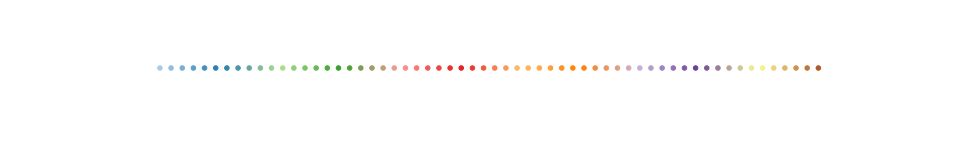

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 2))
colors = plt.cm.Paired(np.linspace(0,1,60))
plt.scatter( range(60), [0]*60, color=colors )
plt.axis("off")

We will use this colormap to visualize the Sepal's width and length. From the plot, it suggests that a linear classifier should be good for this problem. 

([], <a list of 0 Text yticklabel objects>)

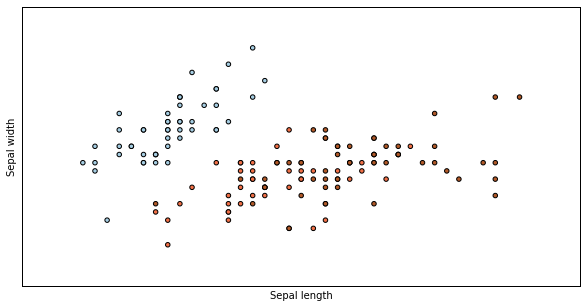

In [2]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(10, 5))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

With very high-dimension data, it is not easy to visualize or model. The common technique is to use dimensionality reduction. Projecting the original data into a subset of lower dimensional subspace and use those reduced-order data to build the model, it helps to not only reduce te computational costs but also to have a lower variance model. The common technique is Principal Component Analysis (PCA).

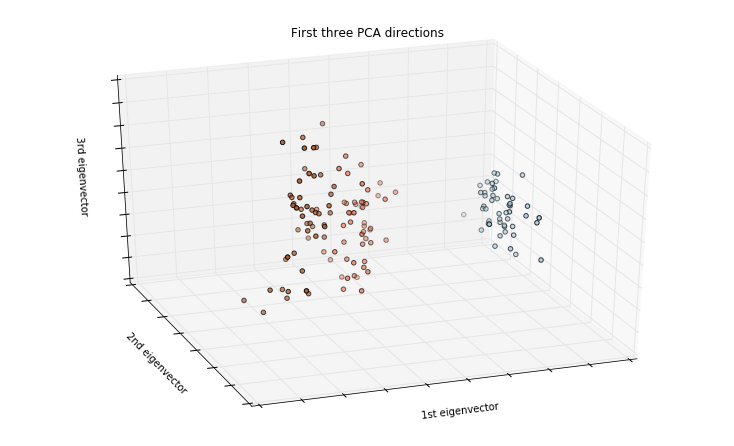

In [3]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# To getter a better understanding of interaction of the dimensions, plot the first three PCA dimensions
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()